In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [79]:
# Remember to change back to the file path
df = pd.read_csv('E:/MSBA/Semester 1/DBA5102 BA Capstone/XAI project/data.csv')
# df = pd.read_csv('data.csv')

In [80]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [ ]:
df.columns

In [ ]:
df.isnull().sum()

Thus there is no missing values that need to handle

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df['Over18'].unique() # Useless (Everyone over 18)
df['EmployeeCount'].unique() # Useless (Only 1)
df['StandardHours'].unique() # Useless (Everyone 80 hours)

In [ ]:
df.dtypes

In [ ]:
num_var = ['Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement',
'JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

boxplot = df.boxplot(column = num_var, grid=False, rot=90, fontsize=8)  


In [ ]:
num_var_ = ['MonthlyIncome']
boxplot = df.boxplot(column = num_var_, grid=False, rot=0, fontsize=15)  

In [ ]:
num_1 = ['Age','DistanceFromHome','Education','EmployeeCount']
boxplot = df.boxplot(column = num_1, grid=False, rot=45, fontsize=15)  

In [ ]:
num_2 = ['EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel']
boxplot = df.boxplot(column = num_2, grid=False, rot=45, fontsize=15)  

In [ ]:
num_3 = ['JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike']
boxplot = df.boxplot(column = num_3, grid=False, rot=45, fontsize=15)  

In [ ]:
num_3_ = ['NumCompaniesWorked','PercentSalaryHike']
boxplot = df.boxplot(column = num_3_, grid=False, rot=45, fontsize=15)  

In [ ]:
num_4 = ['PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears']
boxplot = df.boxplot(column = num_4, grid=False, rot=45, fontsize=15)  

In [ ]:
num_4_ = ['PerformanceRating','StockOptionLevel', 'TotalWorkingYears']
boxplot = df.boxplot(column = num_4_, grid=False, rot=45, fontsize=15)  

In [ ]:
num_4__ = ['PerformanceRating']
boxplot = df.boxplot(column = num_4__, grid=False, rot=45, fontsize=15)  

In [ ]:
num_5 = ['TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']
boxplot = df.boxplot(column = num_5, grid=False, rot=90, fontsize=15)  

In [ ]:
# Outliers: [MonthlyIncome, NumCompaniesWorked, PerformanceRating, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager] 

In [ ]:
plt.figure(figsize=(5,5))
explode_val = (0,0.4,0,0.1)
df.groupby('Attrition')['Age'].count().plot(kind='pie',autopct='%1.1f%%', ylabel='', wedgeprops={'linewidth': 4.0, 'edgecolor':'white'}, textprops={'fontsize':17,'style':'italic','fontweight':'bold'})
plt.title('Attrition', fontsize=20, fontweight='bold')

In [ ]:
sns.catplot(x = 'Attrition', hue = 'EnvironmentSatisfaction', data=df, kind='count', legend='')

plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(title='EnvironmentSatisfaction', loc='upper right', bbox_to_anchor =(1.1, 0.5, 0.6, 0.5), fontsize=14, title_fontsize=14, labels=['Low','Medium','High','Very High'])
plt.title('Attrition per EnvironmentSatisfaction', fontsize=20, fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

In [ ]:
sns.catplot(x = 'Attrition', hue = 'NumCompaniesWorked', data=df, kind='count', legend='')

plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(title='# of Companies', loc='upper right', bbox_to_anchor =(1.1, 0.5, 0.6, 0.5), fontsize=14, title_fontsize=14)
plt.title('Attrition per # of Previous Companies', fontsize=20, fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

In [ ]:
sns.catplot(x = 'Attrition', hue = 'Department', data=df, kind='count', legend='')
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(title='Department', loc='upper right', bbox_to_anchor =(1.2, 0.5, 0.6, 0.5), fontsize=14, title_fontsize=14)
plt.title('Attrition per Departments', fontsize=20, fontweight='bold')
plt.yticks(fontsize=15)

In [ ]:
sns.catplot(x = 'Attrition', hue = 'BusinessTravel', data = df, kind = 'count', legend='')
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(title='BusinessTravel',loc='upper right', bbox_to_anchor =(1.2, 0.5, 0.6, 0.5), fontsize=14, title_fontsize=14)
plt.title('Attrition per BusinessTravel', fontsize=20, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [ ]:
sns.catplot(x = 'Attrition', hue = 'Education', data = df, kind = 'count', legend = '')
plt.legend(title='Education', loc='upper right',labels=['Below College','College','Bachelor','Master','Doctor'],bbox_to_anchor =(1.2, 0.6, 0.3, 0.5), fontsize=12, title_fontsize=12)
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Attrition per Education', fontsize=20, fontweight='bold')

In [ ]:
sns.catplot(x = 'Attrition', hue = 'Gender', data = df, kind = 'count', legend='')

plt.legend(title='Gender', loc='upper right',labels=['Female','Male'],bbox_to_anchor =(1.2, 0.6, 0.3, 0.5), fontsize=15, title_fontsize=15)
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Attrition per Gender', fontsize=20, fontweight='bold')

In [ ]:
sns.catplot(x = 'Attrition', hue = 'JobSatisfaction', data = df, kind = 'count', legend='')

plt.legend(title='JobSatisfaction', loc='upper right',labels=['Low','Medium','High', 'Very High'],bbox_to_anchor =(1.3, 0.6, 0.3, 0.5), fontsize=15, title_fontsize=15)
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Attrition per JobSatisfaction', fontsize=20, fontweight='bold')

In [ ]:
sns.catplot(x = 'Attrition', hue = 'PerformanceRating', data = df, kind = 'count', legend='')

plt.legend(title='PerformanceRating', loc='upper right',labels=['Low','Good'],bbox_to_anchor =(1.5, 0.6, 0.3, 0.5), fontsize=15, title_fontsize=15)
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Attrition per PerformanceRating', fontsize=20, fontweight='bold')

In [ ]:
sns.catplot(x = 'Attrition', hue = 'WorkLifeBalance', data = df, kind = 'count', legend='')

plt.legend(title='WorkLifeBalance', loc='upper right',labels=['Bad','Good','Better','Best'], bbox_to_anchor =(1.4, 0.6, 0.3, 0.5), fontsize=15, title_fontsize=15)
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Attrition per WorkLifeBalance', fontsize=20, fontweight='bold')

# Feature selection and prepocessing

In [81]:
#features below are useless as proven by EDA steps hence we drop those four features
df.drop('EmployeeCount',axis=1,inplace=True)
df.drop('EmployeeNumber',axis=1,inplace=True)
df.drop('Over18',axis=1,inplace=True)
df.drop('StandardHours', axis=1, inplace=True)

In [ ]:
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

Some other conclusions we get from the correlation table:

1. Job level and total working years are highly correlated.
2. Monthly Income and total working years are highly correlated.
3. Performance rating and percentage salary hike are highly correlated.
4. Years in current role and years at company are highly correlated.
5. Years with current manager and years at company are highly correlated.
6. Monthly income and job level highly correlated

### Old FE methods

In [ ]:
# Handling Categorical features

# #binarize attrituion, Gender, OverTime and Attrition
# df['Male'] = df.Gender == True
# df.drop('Gender', axis = 1,inplace=True)
# df['OverTime'] = df.OverTime == True
# df['Attrition'] = df.Attrition == True

In [ ]:
# '''
# Codes updated
# '''
# # Handling Categorical features

# df['Male'] = np.where(df['Gender']=='Male',1,0)
# df['OverTime'] = np.where(df['OverTime']=='Yes',1,0)
# df['Attrition'] = np.where(df['Attrition']=='Yes',1,0)
# df.drop('Gender', axis = 1,inplace=True)

In [ ]:
# #encoding categorical features:

# df = pd.get_dummies(df, columns=['Department',
#                         'EducationField','JobRole','MaritalStatus'])

In [ ]:
# '''
# Codes updated
# '''

# # Convert Business Travel to ordinal feature 
# df['BusinessTravel'] = np.where(df['BusinessTravel']=='Non-Travel',0,df['BusinessTravel'])
# df['BusinessTravel'] = np.where(df['BusinessTravel']=='Travel_Rarely',1,df['BusinessTravel'])
# df['BusinessTravel'] = np.where(df['BusinessTravel']=='Travel_Frequently',2,df['BusinessTravel'])

In [ ]:
# df['BusinessTravel'] = df['BusinessTravel'].astype(int)

In [ ]:
# X = df.drop("Attrition", axis=1)
# y = df["Attrition"]

In [ ]:
# '''
# Original codes - standardize everything including categorical features
# '''
# #Standardization
# scaler = StandardScaler()
# X[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','NumCompaniesWorked','PerformanceRating','StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]=scaler.fit_transform(X[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','NumCompaniesWorked','PerformanceRating','StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']])
# # handling outliers

In [ ]:
# '''
# Updated codes - scale only numerical features 
# '''

# #Standardization
# scaler = StandardScaler()
# continuous_features = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','NumCompaniesWorked',
# 'PercentSalaryHike','TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# X[continuous_features]=scaler.fit_transform(X[continuous_features])
# # handling outliers

### New FE methods

- Standardize numerical features
- Use Onehot encoding for all categorical methods

In [82]:
df['Attrition'] = np.where(df['Attrition']=='Yes',1,0)

In [83]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [84]:
# Numerical features 
numerical = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','NumCompaniesWorked',
'PercentSalaryHike','TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
# Categorical features 
categorical = X.columns.difference(numerical)

In [85]:
# Handle categorical features before train-test split using get_dummies
X = pd.get_dummies(X,columns=categorical)
X

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
0      41       1102                 1          94           5993   
1      49        279                 8          61           5130   
2      37       1373                 2          92           2090   
3      33       1392                 3          56           2909   
4      27        591                 2          40           3468   
...   ...        ...               ...         ...            ...   
1465   36        884                23          41           2571   
1466   39        613                 6          42           9991   
1467   27        155                 4          87           6142   
1468   49       1023                 2          63           5390   
1469   34        628                 8          82           4404   

      MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0           19479                   8                 11                  8   
1           24907                   1                 23                 10   
2            2396                   6                 15                  7   
3           23159                   1                 11                  8   
4           16632                   9                 12                  6   
...           ...                 ...                ...                ...   
1465        12290                   4                 17                 17   
1466        21457                   4                 15                  9   
1467         5174                   1                 20                  6   
1468        13243                   2                 14                 17   
1469        10228                   2                 12                  6   

      TrainingTimesLastYear  ...  RelationshipSatisfaction_3  \
0                         0  ...                           0   
1                         3  ...                           0   
2                         3  ...                           0   
3                         3  ...                           1   
4                         3  ...                           0   
...                     ...  ...                         ...   
1465                      3  ...                           1   
1466                      5  ...                           0   
1467                      0  ...                           0   
1468                      3  ...                           0   
1469                      3  ...                           0   

      RelationshipSatisfaction_4  StockOptionLevel_0  StockOptionLevel_1  \
0                              0                   1                   0   
1                              1                   0                   1   
2                              0                   1                   0   
3                              0                   1                   0   
4                              1                   0                   1   
...                          ...                 ...                 ...   
1465                           0                   0                   1   
1466                           0                   0                   1   
1467                           0                   0                   1   
1468                           1                   1                   0   
1469                           0                   1                   0   

      StockOptionLevel_2  StockOptionLevel_3  WorkLifeBalance_1  \
0                      0                   0                  1   
1                      0                   0                  0   
2                      0                   0                  0   
3                      0                   0                  0   
4                      0                   0                  0   
...                  ...                 ...                ...   
1465                   0                   0                  0   
1466      

#### Prepare preprocessed data for train-test split

In [86]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

# Check class imbalance in set
print('Train attrition class = {}'.format(sum(y_train == 1)))
print('Train attrition class = {}'.format(sum(y_train == 0)))
print('Test attrition class = {}'.format(sum(y_test == 1)))
print('Test attrition class = {}'.format(sum(y_test == 0)))

Train attrition class = 199
Train attrition class = 977
Test attrition class = 38
Test attrition class = 256


In [87]:
# Standardization for numerical features
scaler = StandardScaler()

X_train[numerical]=scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.fit_transform(X_test[numerical])

In [88]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check class imbalance in set
print('Train attrition class = {}'.format(sum(y_train == 1)))
print('Train attrition class = {}'.format(sum(y_train == 0)))
print('Test attrition class = {}'.format(sum(y_test == 1)))
print('Test attrition class = {}'.format(sum(y_test == 0)))

Train attrition class = 977
Train attrition class = 977
Test attrition class = 38
Test attrition class = 256


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

#basic logistic regression model
clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)
#Accuracy
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('report: ' + str(classification_report(y_test,y_pred)))
#Roc_auc score
print('ROC-AUC score' + str(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])))
#Confusion metrics
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8945578231292517
report:               precision    recall  f1-score   support

           0       0.92      0.96      0.94       256
           1       0.63      0.45      0.52        38

    accuracy                           0.89       294
   macro avg       0.78      0.70      0.73       294
weighted avg       0.88      0.89      0.89       294

ROC-AUC score0.8460115131578947
Confusion Matrix : 
[[246  10]
 [ 21  17]]


In [90]:
from xgboost import XGBClassifier
XGBoost = XGBClassifier(objective='binary:logistic',random_state=0,n_jobs=-1,use_label_encoder=False, eval_metric = 'aucpr') #, tree_method = 'gpu_hist'
param ={
    'reg_lambda': [0, 1e-1, 1, 10, 50],
    'n_estimators':range(100,1500,300),
    'eta':np.linspace(0.1,0.7,3),
}
# gs = GridSearchCV(estimator=finalPipe,param_grid=param,scoring = 'neg_root_mean_squared_error',n_jobs = -1,cv = 5,verbose = -1)
# finalPipe.set_params(gs.best_params_)

In [91]:
XGBoost.fit(X_train,y_train)
y_pred = XGBoost.predict(X_test)
#Accuracy
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('report: ' + str(classification_report(y_test,y_pred)))
#Roc_auc score
print('ROC-AUC score' + str(roc_auc_score(y_test, XGBoost.predict_proba(X_test)[:,1])))
#Confusion metrics
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8707482993197279
report:               precision    recall  f1-score   support

           0       0.92      0.93      0.93       256
           1       0.50      0.47      0.49        38

    accuracy                           0.87       294
   macro avg       0.71      0.70      0.71       294
weighted avg       0.87      0.87      0.87       294

ROC-AUC score0.8442639802631579
Confusion Matrix : 
[[238  18]
 [ 20  18]]


## Global Surrogate Model

In [ ]:
# Install surrogate model implementation tool
# !pip install interpret

In [ ]:
# Unable to use MimicExplainer

# from interpret.ext.blackbox import MimicExplainer
# from interpret.ext.glassbox import LinearExplainableModel
# from interpret.ext.glassbox import DecisionTreeExplainableModel

# model = XGBoost


# explainer = MimicExplainer(model,
#                            X_train,
#                            DecisionTreeExplainableModel,
#                            augment_data=False,
#                            features=X_train.columns)

In [92]:
# Create predicted y value from XGBoost model trained earlier 
prediction = XGBoost.predict(X_train)

# Use the predicted value with original X_train data to fit a simple decision tree
from sklearn import tree

dt = tree.DecisionTreeClassifier().fit(X_train,prediction)

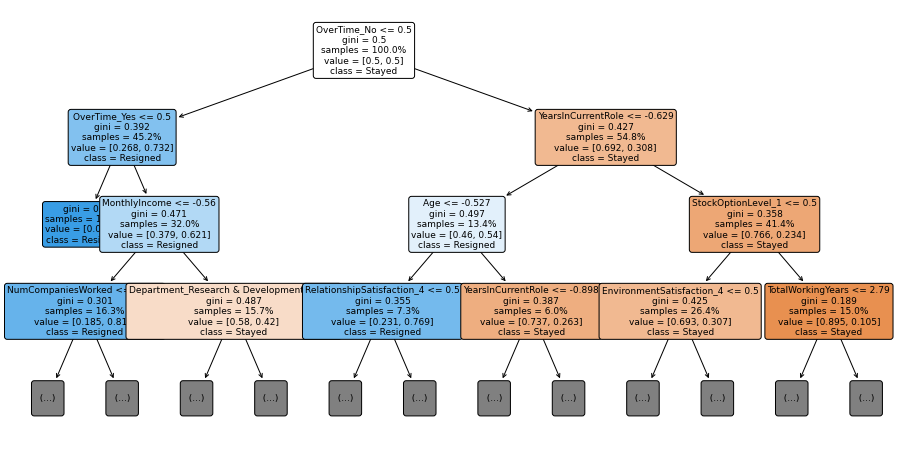

In [93]:
# visualization the global surrogate decition tree model with max_depth = 3
fig = plt.figure(figsize=(16, 8))
vis = tree.plot_tree(dt, feature_names = X_train.columns, class_names = ['Stayed', 'Resigned'], max_depth=3, fontsize=9, proportion=True, filled=True, rounded=True) 

In [94]:
# Assess how well the global surrogate model reproduce the results from original XGBoost model 
dt.score(X_train,prediction) 

1.0

## Feature Importance

In [95]:
x = X_test
y = y_test

Text(0.5, 0, 'Xgboost Feature Importance')

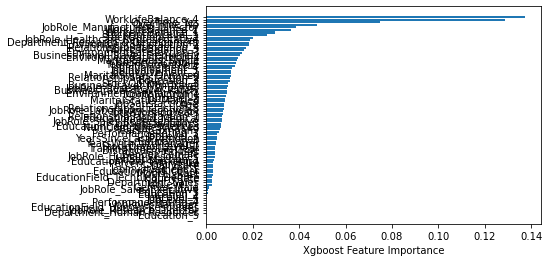

In [96]:
sorted_idx = XGBoost.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx], XGBoost.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

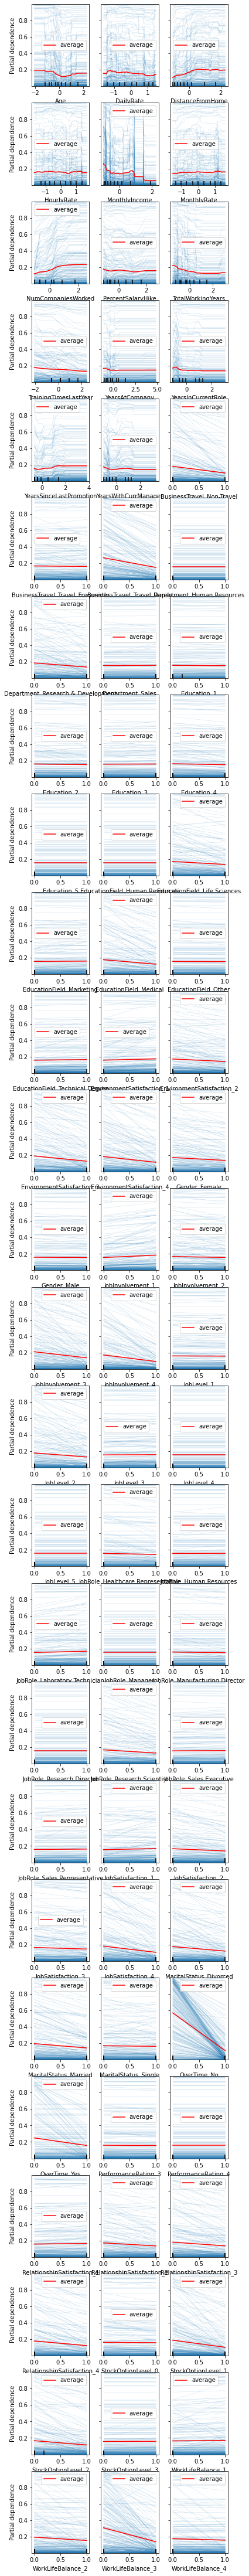

In [97]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(6, 80))
PartialDependenceDisplay.from_estimator(XGBoost, x, features=x.columns, kind ='both',ax=ax,line_kw={"color": "red"},ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},n_jobs=-1)

In [98]:
import shap

In [99]:
f = lambda x: XGBoost.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X.iloc[0:1000,:])

Permutation explainer: 1001it [01:03, 13.25it/s]                         


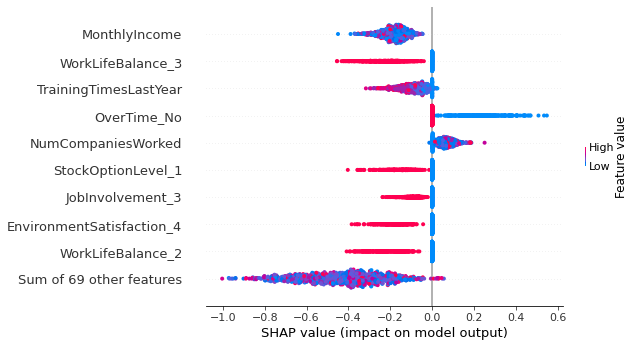

In [100]:
shap.plots.beeswarm(shap_values)

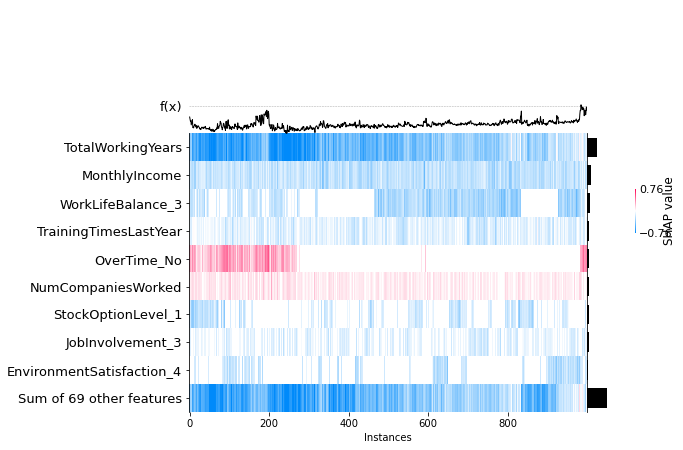

In [101]:
shap.plots.heatmap(shap_values)

In [102]:
shap.initjs()
explainer = shap.KernelExplainer(XGBoost.predict_proba, x)
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0,:])

Using 294 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [108]:
shap.initjs()
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

100%|██████████| 294/294 [24:20<00:00,  4.97s/it]


## LIME Explanations
LIME generates local explanations, in other words, explanations for individual instances in a dataset. LIME starts by generating a new dataset of perturbations around the instance to be explained. Then, the trained machine learning classifier is used to predict the class of each instance in the new generated dataset. Finally, a simpler model with intrinsic intepretability, for instance a linear regression model, is fitted and used to explain the prediction of the classifier. Before fitting a simpler model, the instances in the new generated dataset are weighed based on their distance to the original instance being explained. In this way, there is a higher certainty that the model is locally faithful around the explained instance. 

### 1. Import LIME package

In [110]:
# pip install lime

In [111]:
 import lime
import lime.lime_tabular

### 2. Create the Explainer

In [112]:
predict_fn_rf = lambda x: XGBoost.predict_proba(x).astype(float)
X = X_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = X_train.columns,class_names=['Will leave','Will not Leave'],kernel_width=5)

### 3. Use the explainer to explain predictions

In [113]:
X_test.head(5)

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
42   -1.264357   1.290790          1.810475   -0.851827      -0.923297   
76   -0.327508  -0.125735         -1.042296   -1.635209      -0.520676   
1380 -0.327508  -0.354915          0.978416    0.274283      -0.271606   
252  -0.952074  -0.396362          0.621820   -0.264291      -0.913925   
388   0.401153  -1.527632         -1.042296    1.449356      -0.866862   

      MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
42      -0.505937           -0.669726          -0.857382          -1.321456   
76       1.272164           -1.078231          -0.307610           0.504240   
1380     0.267219           -1.078231           0.242161          -0.712891   
252      1.223209           -0.669726           1.066819          -0.712891   
388      0.911634            0.147284           0.242161          -0.469465   

      TrainingTimesLastYear  ...  RelationshipSatisfaction_3  \
42                -0.578860  ...                           1   
76                -0.578860  ...                           0   
1380              -0.578860  ...                           0   
252               -1.338613  ...                           0   
388                1.700400  ...                           0   

      RelationshipSatisfaction_4  StockOptionLevel_0  StockOptionLevel_1  \
42                             0                   1                   0   
76                             0                   1                   0   
1380                           1                   0                   1   
252                            0                   1                   0   
388                            0                   0                   1   

      StockOptionLevel_2  StockOptionLevel_3  WorkLifeBalance_1  \
42                     0                   0                  0   
76                     0                   0                  0   
1380                   0                   0                  1   
252                    0                   0                  0   
388                    0                   0                  0   

      WorkLifeBalance_2  WorkLifeBalance_3  WorkLifeBalance_4  
42                    1                  0                  0  
76                    0                  1                  0  
1380                  0                  0                  0  
252                   0                  1                  0  
388                   0                  1                  0  

[5 rows x 78 columns]

In [114]:
choosen_instance = X_test.loc[[42]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)

Interpretation:

The model predicts 100% probability of that the employee will not have attrition.Biggest effect is his job level is 1.0; This has decreased his chances of leaving significantly. Next, the person has an environment satisfaction of 1.00 which increased his chance of staying.

In [115]:
choosen_instance = X_test.loc[[1380]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)

Interpretation

The model predicts 90% probability of that the employee will have attrition.Biggest effect is his job research scientist is 0.0; This has increased his chances of leaving significantly.

## Counterfactual cases

In [116]:
# import DiCE
import dice_ml

In [121]:
# Load preprocessed dataset
train = pd.concat([X_train,y_train],axis=1)
test = pd.concat([X_test,y_test],axis=1)
preprocessed_df = pd.concat([train,test],axis=0)
preprocessed_df

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
0     0.376433  -0.867473          0.866927    0.886201       0.334859   
1    -0.959303  -0.150006          2.114028   -0.887625      -0.362310   
2    -0.291435   1.441873          0.118666    1.034019      -0.518800   
3    -0.736681  -0.404109          0.991637    1.428203       1.194363   
4    -0.514058  -0.742913         -0.754306    1.329657       0.070796   
...        ...        ...               ...         ...            ...   
741   0.401153  -1.371595         -0.566835    1.204549       2.269352   
582   0.192964  -0.089164         -0.923431   -1.341441      -0.534237   
1297 -1.264357   0.225348          1.216147    0.176361      -0.952212   
1145 -0.223413  -0.654799          0.265224    0.519090      -0.450681   
879   2.274851  -0.320782         -0.329104   -0.655982      -0.339607   

      MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0        0.781684            1.312553          -0.063366           0.896428   
1        1.381568           -0.680169          -1.155209          -0.801155   
2       -0.287435           -0.680169          -0.336327           0.504678   
3        1.618916           -0.680169           2.120321          -0.278822   
4       -0.113659           -0.680169          -0.882248          -0.409405   
...           ...                 ...                ...                ...   
741     -0.903862            1.372800          -0.582496           1.112805   
582     -0.595427           -0.669726           2.441248          -0.469465   
1297    -1.029605           -1.078231          -1.132268          -0.712891   
1145    -0.240035            2.598315          -0.857382          -0.591178   
879     -0.458123           -1.078231           0.791933           0.017388   

      TrainingTimesLastYear  ...  RelationshipSatisfaction_4  \
0                 -0.630926  ...                           1   
1                 -2.191325  ...                           0   
2                  0.149273  ...                           0   
3                 -0.630926  ...                           1   
4                 -0.630926  ...                           0   
...                     ...  ...                         ...   
741                0.180894  ...                           0   
582               -0.578860  ...                           1   
1297               0.180894  ...                           0   
1145              -0.578860  ...                           0   
879                0.180894  ...                           0   

      StockOptionLevel_0  StockOptionLevel_1  StockOptionLevel_2  \
0                      1                   0                   0   
1                      0                   1                   0   
2                      0                   1                   0   
3                      0                   0                   1   
4                      0                   1                   0   
...                  ...                 ...                 ...   
741                    1                   0                   0   
582                    0                   1                   0   
1297                   1                   0                   0   
1145                   0                   0                   1   
879                    0                   1                   0   

      StockOptionLevel_3  WorkLifeBalance_1  WorkLifeBalance_2  \
0                      0                  0                  1   
1                      0                  0                  0   
2                      0                  0                  0   
3                      0                  0                  0   
4                      0                  0                  0   
...                  ...                ...                ...   
741                    0                  0                  0   
582                    0                  0                

In [122]:
# Obtain the list of employees who have left the company from test group 

left = test.loc[test['Attrition']==1]
left

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
42   -1.264357   1.290790          1.810475   -0.851827      -0.923297   
547   0.401153   0.257043          1.097282   -0.411175      -0.830369   
1396  1.546190   0.829993          1.691609    0.029477       0.702940   
777  -1.784828   1.234714          0.027493   -1.439363      -1.098185   
36    1.233907   0.101006         -0.804565    1.008703      -0.845525   
911  -1.368451  -0.557276          1.691609    0.372206      -1.157611   
947   1.442096   0.493537         -0.566835   -0.068446       0.303709   
421  -0.952074  -1.022949          1.810475    0.274283      -0.872845   
1354  1.858473   0.815364          1.691609    1.547278      -0.864669   
210  -0.639791   0.530109         -0.685700   -1.635209       0.693368   
591  -0.535696  -1.729993          0.740685    0.176361      -0.318867   
385  -0.847979  -0.886417         -0.685700   -1.243518      -0.924892   
1273 -1.680734   1.137191         -0.210238    0.665974      -0.902358   
1271 -1.784828  -1.196053         -0.329104   -1.684170      -0.846323   
171  -1.993017  -0.549962         -1.042296    1.694162      -0.916916   
1033 -0.743885   1.505341         -1.042296    1.694162       0.104293   
204  -0.015225   0.859250          2.285936    0.225322      -0.049855   
857   0.609341   0.656889          0.027493    1.498317      -0.795073   
327   0.088870   0.815364         -0.804565   -1.194557      -0.336017   
585  -1.576640   1.012849         -0.447969   -0.117407      -1.061293   
69   -0.223413  -1.242377         -0.091373    0.665974      -0.704937   
975   1.754379  -1.366719          0.384089    0.959742       1.350443   
1332 -0.952074  -0.898607          1.691609    0.372206      -0.894182   
828  -2.097111  -1.415480         -0.210238    0.714935      -1.000870   
1452  1.233907   0.122949         -1.042296    1.400394      -0.038887   
50    1.025719  -0.491448         -1.042296    1.596240      -0.307501   
598  -1.056168   0.152206         -0.923431   -0.949750      -0.506717   
457  -2.097111   1.166448         -0.566835    0.176361      -1.006055   
453  -1.264357  -0.979064          0.859551   -0.362214      -0.833959   
1205 -0.639791   1.051858         -0.923431    1.449356      -1.102771   
689  -1.888923  -1.703174         -0.685700    0.910781      -0.787694   
45    0.297058   1.298104          0.265224   -0.802866       2.517026   
568   1.754379  -0.250077         -0.923431    0.617013       2.579643   
33    0.088870   0.164396         -0.566835   -0.460137      -0.964576   
1279  0.609341  -0.971750         -1.042296    1.645201      -0.913526   
566   0.921624  -0.264706          2.048205    0.568051      -0.104894   
838   0.401153  -0.844969          0.265224   -1.047673       1.363006   
1297 -1.264357   0.225348          1.216147    0.176361      -0.952212   

      MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
42      -0.505937           -0.669726          -0.857382          -1.321456   
547      0.893936            1.372800          -0.857382          -0.591178   
1396    -1.178898            1.372800          -0.582496           0.382527   
777      0.450338           -0.669726          -0.582496          -1.321456   
36      -1.469063           -0.669726          -0.307610          -1.078030   
911     -0.865325           -0.669726          -0.307610          -1.321456   
947      1.060642            2.598315           1.066819          -0.226039   
421      0.599061            0.964294           0.242161          -0.712891   
1354    -0.548327           -0.669726           0.242161          -0.834604   
210      1.671231           -0.669726          -1.132268           0.260814   
591      1.770427            0.964294          -0.032725          -0.712891   
385     -1.523728            2.598315           2.166362          -1.078030   
1273     0.270644           -0.669726           0.517047          -1.321456   
1271    -1.361019 

In [123]:
# Select on employee as our study focus

input_datapoint = X_test.loc[[1273]]

In [124]:
# Dataset for training an ML model
d = dice_ml.Data(dataframe=preprocessed_df, continuous_features=numerical, outcome_name='Attrition')

# Pre-trained XGBoost model
m = dice_ml.Model(model=XGBoost, backend='sklearn')

# DiCE explanation instance
exp = dice_ml.Dice(d,m)

In [126]:
# Obtain for column names for preprocessed data

cols = []
for i in X_train.columns:
    cols.append(i)

print (cols)

['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Human Resources', 'Department_Research & Development', 'Department_Sales', 'Education_1', 'Education_2', 'Education_3', 'Education_4', 'Education_5', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'EnvironmentSatisfaction_1', 'EnvironmentSatisfaction_2', 'EnvironmentSatisfaction_3', 'EnvironmentSatisfaction_4', 'Gender_Female', 'Gender_Male', 'JobInvolvement_1', 'JobInvolvement_2', 'JobInvolvement_3', 'JobInvolvement_4', 'JobLevel_1', 'JobLevel_2', 'JobLevel_3', 'JobLevel_4', 'JobLevel_5

In [131]:
# # We would predefine the features allowed to vary 

# # numerical features allowed to vary
# numerical_to_vary = ['DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike',
#                     'TrainingTimesLastYear','YearsSinceLastPromotion','YearsWithCurrManager']

# categorical_to_vary = ['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely','JobLevel_1', 'JobLevel_2', 'JobLevel_3', 'JobLevel_4', 'JobLevel_5',
#                     'JobSatisfaction_1', 'JobSatisfaction_2', 'JobSatisfaction_3', 'JobSatisfaction_4','OverTime_No', 'OverTime_Yes','RelationshipSatisfaction_1',
#                      'RelationshipSatisfaction_2', 'RelationshipSatisfaction_3', 'RelationshipSatisfaction_4','WorkLifeBalance_1', 'WorkLifeBalance_2', 'WorkLifeBalance_3', 'WorkLifeBalance_4']

# features_to_vary = numerical_to_vary + categorical_to_vary

In [134]:
# print(features_to_vary)

In [135]:
# Generate counterfactual examples

features_to_vary = ['DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike',
                    'TrainingTimesLastYear','YearsSinceLastPromotion','YearsWithCurrManager']

dice_exp = exp.generate_counterfactuals(input_datapoint, total_CFs=4, desired_class="opposite",features_to_vary=features_to_vary)
# Visualize counterfactual explanation
dice_exp.visualize_as_dataframe()

  0%|          | 0/1 [45:24<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# # Maybe... can try this code

# # generate counterfactuals
# dice_exp_random = exp_random.generate_counterfactuals(query_instances, total_CFs=2, desired_class="opposite", verbose=False)
# dice_exp_random.visualize_as_dataframe(show_only_changes=True)